# INTRODUCTION TO CRYPTOHACK


## ASCII Encoding

ASCII is a 7-bit encoding standard that allows us to represent text using integers between 0 and 127.

In python we, use 2 predefined functions to convert to and from ASCII coding.
1. `chr()`: converts an ASCII ordinal number to a character
2. `ord()`: converts a character to an ASCII ordinal number

An example below shows how this can be used.

In [43]:
# Given the following array of numbers, decode the text
ords = [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]

# From ASCII to Unicode, we use chr()
print("".join(chr(ord) for ord in ords))
print("---------------------------")

crypto{ASCII_pr1nt4bl3}
---------------------------


## Hex Encoding

Ciphertexts may end up having bytes that are not printable ASCII characters, for example: Nul is escaped as \0, Tab is escaped as \t, Line feed is escaped as \n.
Thus to share the encrypted data it is common to encode it into something more portable across different systems. This is where **Hex Encoding** comes in.

Hexadecimal can be used to represent ASCII strings by:
1. Converting each letter to an ordinal number according to the ASCII table.
2. Decimal numbers are then converted to base-16 / hexadecimal numbers.
3. Combine each result into one long hex string

In Python we use 2 predefinedd functions to carry out the encoding and decoding:
1. `bytes.fromhex()`: converts our parameter from hex to bytes.
2. `.hex()`: called on byte strings to ge the hex representation.

An example below shows how to use this.

In [44]:
# Decoding a given hex string 
hex_string1 = "63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d"
decoded_hex1 = bytes.fromhex(hex_string1)

print(decoded_hex1)

b'crypto{You_will_be_working_with_hex_strings_a_lot}'


## Base64 Encoding

This encoding method allows us to represent binary data (in bits/bytes) as an ASCII string using an alphabet of 64 characters.

One character of Base64 string encodes 6 bits, thus 4 characters encodes 3 bytes.

Base64 is commonly used online to encode images into HTML or CSS files.

In Python, after importing the Base64 module (`import base64`), you can use functions to encode and decode:
1. `base64.b64encode()`: to encode given binary data to Base64 string

An example shows how to use this

In [45]:
hex_string2 = "72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf"
byte_string2 = bytes.fromhex(hex_string2)
print(byte_string2)

import base64
base64_string = base64.b64encode(byte_string2)

print(base64_string)

b'r\xbc\xa9\xb6\x8f\xc1j\xc7\xbe\xeb\x8f\x84\x9d\xca\x1d\x8ax>\x8a\xcf\x96y\xbf\x92i\xf7\xbf'
b'crypto/Base+64+Encoding+is+Web+Safe/'


## Making a text RSA enabled

RSA works on numbers, but messages are made up of characters thus we need to convert our messages into numbers so that mathematical operations can be carried out on them.

The most common way to do is to:
1. Convert message to ordinal bytes
2. Convert ordinal to hexadecimal
3. Concatenate into hex string
4. Represent hex string as decimal number

Illustration
<span color = 'yellow'>
message: HELLO
ascii bytes: [72, 69, 76, 76, 79]
hex bytes: [0x48, 0x45, 0x4c, 0x4c, 0x4f]
base-16: 0x48454c4c4f
base-10: 310400273487
</span>

In Python, we can use the following functions from PyCryptodome to carry out this whole operation:
1. `bytes_to_long()`: convert our bytes to integer
2. `long_to_bytes()`: convert our integers to bytes

Example



In [46]:
# Given the integer below, find the message encrypted
int_message =  11515195063862318899931685488813747395775516287289682636499965282714637259206269

from Crypto.Util.number import *
decoded_message = long_to_bytes(int_message)
print(decoded_message)

b'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'


## XOR operations

XOR is a bitwise operator denoted by ⊕ mathematically, `^` otherwise. Its truth table is as shown below. 

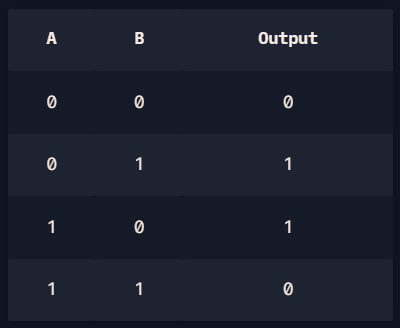

To use this on integers, convert the decimal to binary then XOR while on strings, convert each character to integer representing the Unicode character then XOR.

In Python, we can use the caret `^` or use the `xor()` function from `pwntools` library.

Example

In [47]:
# XOR 'label' with 13
string = "label"
key = 13

def xor_string_key(string, key):
    ascii_string = [ord(letter) for letter in string]
    encoded_ascii = [char ^ key for char in ascii_string]
    encoded_string = "".join([chr(char) for char in encoded_ascii])
    return encoded_string

print(xor_string_key(string, key))

aloha


## Challenge 1

Some data has been hidden using XOR within a single byte, but that byte is a secret.

In [65]:

# Using brute force to find the string, since we that the text contains "crytpo"
def decoder(encoded):
    byte_data = bytes.fromhex(encoded)
    for secret in range(0, 255):
        ascii_data = [char for char in byte_data]
        decoded = "".join([chr(secret ^ i) for i in ascii_data])

        if "crypto" in decoded:
            answer = decoded
            return answer

encoded = "73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d"
decoder(encoded)

'crypto{0x10_15_my_f4v0ur173_by7e}'

## Challenge 2

Flag has been encrypted with secret key

In [67]:
encrypted_flag = "0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104"

decoder(encrypted_flag)